In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bitrates
import runtimes

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

## Setups for Which We Have Bitrates

In [3]:
sorted(bitrates.bitrates.keys())

['AnsCoder<u16, u32>, 12, NonLookup',
 'AnsCoder<u16, u32>, 16, NonLookup',
 'AnsCoder<u16, u64>, 12, NonLookup',
 'AnsCoder<u16, u64>, 16, NonLookup',
 'AnsCoder<u32, u64>, 16, NonLookup',
 'AnsCoder<u32, u64>, 24, NonLookup',
 'AnsCoder<u32, u64>, 32, NonLookup',
 'RangeEncoder<u16, u32>, 12, NonLookup',
 'RangeEncoder<u16, u32>, 16, NonLookup',
 'RangeEncoder<u16, u64>, 12, NonLookup',
 'RangeEncoder<u16, u64>, 16, NonLookup',
 'RangeEncoder<u32, u64>, 16, NonLookup',
 'RangeEncoder<u32, u64>, 24, NonLookup',
 'RangeEncoder<u32, u64>, 32, NonLookup',
 'arcode 24',
 'arcode 32',
 'arcode 48',
 'arcode 63']

## Additional Setups for Which We Have Runtimes

In [4]:
assert len(set(bitrates.bitrates.keys()) - set(runtimes.runtimes.keys())) == 0
sorted(set(runtimes.runtimes.keys()) - set(bitrates.bitrates.keys()))

['AnsCoder<u16, u32>, 12, Lookup',
 'AnsCoder<u16, u32>, 16, Lookup',
 'AnsCoder<u16, u64>, 12, Lookup',
 'RangeEncoder<u16, u32>, 12, Lookup',
 'RangeEncoder<u16, u32>, 16, Lookup',
 'RangeEncoder<u16, u64>, 12, Lookup']

## Compare Bitrates

In [5]:
bitrates.bitrates_headers

('time step', 'cross entropy per symbol', 'bits per symbol')

In [6]:
entropies = bitrates.entropies[:, 1]
def bitrate_overhead(label, total=True):
    result = bitrates.bitrates[label][:, 2 if total else 1] - entropies
    cnt = np.sum(result <= 0)
    if cnt != 0:
        print(f'{label}: {cnt} nonpositive overheads: {[i for i in result if i <= 0]}')
    return result

In [7]:
entropies.mean()

0.4126137048295399

AnsCoder<u32, u64>, 24, NonLookup: 1 nonpositive overheads: [-2.231200520175225e-07]


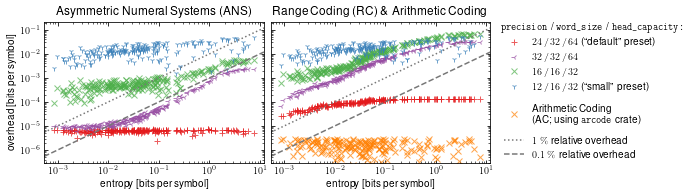

In [8]:
# colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
colors = ['#377eb8', '#4daf4a', '#984ea3', '#e41a1c', '#ff7f00']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.6), sharey=True)

ax1.loglog(entropies, bitrate_overhead('AnsCoder<u32, u64>, 24, NonLookup'), '+', c=colors[3], label='$24\,/\,32\,/\,64$ {(``default\'\' preset)}', alpha=0.7)
ax1.loglog(entropies, bitrate_overhead('AnsCoder<u32, u64>, 32, NonLookup'), '3', c=colors[2], label='$32\,/\,32\,/\,64$', alpha=0.7)
ax1.loglog(entropies, bitrate_overhead('AnsCoder<u16, u32>, 16, NonLookup'), 'x', c=colors[1], label='$16\,/\,16\,/\,32$', alpha=0.7)
ax1.loglog(entropies, bitrate_overhead('AnsCoder<u16, u32>, 12, NonLookup'), '1', c=colors[0], label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.7)
ax1.set_title('Asymmetric Numeral Systems (ANS)')

l1, = ax2.loglog(entropies, bitrate_overhead('RangeEncoder<u32, u64>, 24, NonLookup'), '+', c=colors[3], label='$24\,/\,32\,/\,64$ {(``default\'\' preset)}', alpha=0.7)
l2, = ax2.loglog(entropies, bitrate_overhead('RangeEncoder<u32, u64>, 32, NonLookup'), '3', c=colors[2], label='$32\,/\,32\,/\,64$', alpha=0.7)
l3, = ax2.loglog(entropies, bitrate_overhead('RangeEncoder<u16, u32>, 16, NonLookup'), 'x', c=colors[1], label='$16\,/\,16\,/\,32$', alpha=0.7)
l4, = ax2.loglog(entropies, bitrate_overhead('RangeEncoder<u16, u32>, 12, NonLookup'), '1', c=colors[0], label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.7)
ax2.set_title('Range Coding (RC) \\& Arithmetic Coding')

lac, = ax2.loglog(entropies, bitrate_overhead('arcode 63'), 'x', c=colors[4], label='Arithmetic Coding\n(AC; using \\texttt{arcode} crate)', alpha=0.7)
xlim = ax1.get_xlim()

for ax in (ax1, ax2):
    ax.tick_params(axis="x", which="both", direction="in", top="on", labelleft="on" if ax==ax1 else "off")
    ax.tick_params(axis="y", which="both", direction="in", right="on", labelbottom="on")
    l1p, = ax.loglog(xlim, [x / 100 for x in xlim], ':', c='#777777', label='$1~\\%$ relative overhead')
    l01p, = ax.loglog(xlim, [x / 1000 for x in xlim], '--', c='#777777', label='$0.1~\\%$ relative overhead')
    ax.set_xlim(xlim)
    ax.set_xlabel('entropy [bits per symbol]')

ax1.set_ylabel('overhead [bits per symbol]')

plt.text(1.05, 0.94, '\\texttt{precision} / \\texttt{word\\_size} / \\texttt{head\_capacity:}', transform=ax.transAxes)

ax2.add_artist(plt.legend(
    handles=[l1, l2, l3, l4],
    loc="upper left", bbox_to_anchor=(1.02, 0.95), frameon=False))

ax2.add_artist(plt.legend(
    handles=[lac],
    loc="upper left", bbox_to_anchor=(1.02, 0.48), frameon=False))

plt.legend(
    handles=[l1p, l01p],
    loc="upper left", bbox_to_anchor=(1.02, 0.25), frameon=False)

fig.subplots_adjust(wspace=0.03)

In [9]:
fig.savefig('bitrates.pdf', pad_inches=2, bbox_inches='tight')
!pdfcrop bitrates.pdf bitrates-cropped.pdf && rm bitrates.pdf
# Reduce file size (this is a paper about compression, after all):
!gs -sDEVICE=pdfwrite -dCompatibilityLevel=1.4 -dPDFSETTINGS=/prepress -dNOPAUSE -dQUIET -dBATCH -sOutputFile=../../../paper/figures/bitrates.pdf bitrates-cropped.pdf && rm bitrates-cropped.pdf

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `bitrates-cropped.pdf'.


## Compare Runtimes

In [10]:
median_runtimes = {key: np.median(runtimes.runtimes[key], axis=1) for key in runtimes.runtimes.keys()}
mad_runtimes = {key: np.median(np.abs(median_runtimes[key][:, None, :] - runtimes.runtimes[key]), axis=1) for key in runtimes.runtimes.keys()}
for key in runtimes.runtimes.keys():
    assert np.all(mad_runtimes[key][:, 2] == 0)
rel_mad_runtimes = {key: mad_runtimes[key][:, :2] / median_runtimes[key][:, :2] for key in runtimes.runtimes.keys()}
max_rel_mad_runtimes = {key: rel_mad_runtimes[key].max(axis=0) for key in runtimes.runtimes.keys()}
max_rel_mad_runtimes

{'RangeEncoder<u32, u64>, 24, NonLookup': array([0.02298411, 0.0430199 ]),
 'AnsCoder<u32, u64>, 16, NonLookup': array([0.01575935, 0.00593413]),
 'arcode 32': array([0.02636092, 0.02152814]),
 'RangeEncoder<u16, u32>, 12, NonLookup': array([0.02196009, 0.03330825]),
 'AnsCoder<u16, u32>, 12, Lookup': array([0.02306882, 0.00926584]),
 'arcode 48': array([0.04617377, 0.01970637]),
 'AnsCoder<u32, u64>, 24, NonLookup': array([0.01573836, 0.01150672]),
 'RangeEncoder<u16, u64>, 12, NonLookup': array([0.02723192, 0.02536136]),
 'AnsCoder<u16, u32>, 16, NonLookup': array([0.04237821, 0.00893201]),
 'AnsCoder<u16, u32>, 16, Lookup': array([0.02277433, 0.03210111]),
 'RangeEncoder<u32, u64>, 32, NonLookup': array([0.02503469, 0.03754363]),
 'AnsCoder<u32, u64>, 32, NonLookup': array([0.01549229, 0.02598843]),
 'arcode 24': array([0.03993665, 0.01126837]),
 'RangeEncoder<u16, u32>, 16, Lookup': array([0.01999236, 0.00319754]),
 'arcode 63': array([0.03112062, 0.02488201]),
 'RangeEncoder<u16, 

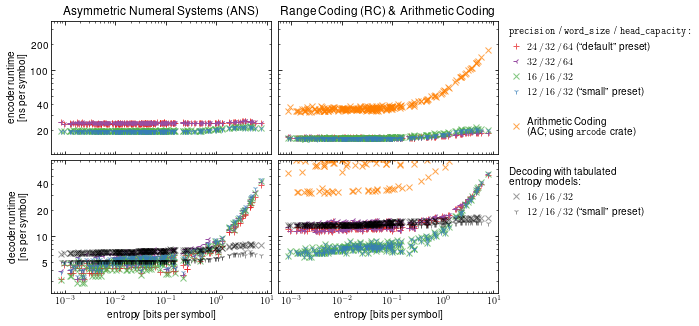

In [11]:
colors = ['#377eb8', '#4daf4a', '#984ea3', '#e41a1c', '#ff7f00']

def plot_runtimes(ax1, ax2, index):
    ax1.loglog(entropies, median_runtimes['AnsCoder<u32, u64>, 24, NonLookup'][:, index], '+', c=colors[3], label='$24\,/\,32\,/\,64$ {(``default\'\' preset)}', alpha=0.7)
    ax1.loglog(entropies, median_runtimes['AnsCoder<u32, u64>, 32, NonLookup'][:, index], '3', c=colors[2], label='$32\,/\,32\,/\,64$', alpha=1)
    ax1.loglog(entropies, median_runtimes['AnsCoder<u16, u32>, 16, NonLookup'][:, index], 'x', c=colors[1], label='$16\,/\,16\,/\,32$', alpha=0.7)
    ax1.loglog(entropies, median_runtimes['AnsCoder<u16, u32>, 12, NonLookup'][:, index], '1', c=colors[0], label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.7)
    if index == 1:
        ax1.loglog(entropies, median_runtimes['AnsCoder<u16, u32>, 16, Lookup'][:, index], 'x', c='k', label='$16\,/\,16\,/\,32$', alpha=0.4)
        ax1.loglog(entropies, median_runtimes['AnsCoder<u16, u32>, 12, Lookup'][:, index], '1', c='k', label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.4)

    ls = []
    ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u32, u64>, 24, NonLookup'][:, index], '+', c=colors[3], label='$24\,/\,32\,/\,64$ {(``default\'\' preset)}', alpha=0.7)
    ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u32, u64>, 32, NonLookup'][:, index], '3', c=colors[2], label='$32\,/\,32\,/\,64$', alpha=1)
    ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u16, u32>, 16, NonLookup'][:, index], 'x', c=colors[1], label='$16\,/\,16\,/\,32$', alpha=0.7)
    ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u16, u32>, 12, NonLookup'][:, index], '1', c=colors[0], label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.7)
    ls += ax2.loglog(entropies, median_runtimes['arcode 63'][:, index], 'x', c=colors[4], label='Arithmetic Coding\n(AC; using \\texttt{arcode} crate)', alpha=0.7)
    if index == 1:
        ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u16, u32>, 16, Lookup'][:, index], 'x', c='k', label='$16\,/\,16\,/\,32$', alpha=0.4)
        ls += ax2.loglog(entropies, median_runtimes['RangeEncoder<u16, u32>, 12, Lookup'][:, index], '1', c='k', label='$12\,/\,16\,/\,32$ {(``small\'\' preset)}', alpha=0.4)

    for ax in (ax1, ax2):
        ax.tick_params(axis="x", which="both", direction="in", top="on", labelleft="on" if ax==ax1 else "off")
        ax.tick_params(axis="y", which="both", direction="in", right="on", labelbottom="on")
    
    return ls

fig, ((ax1t, ax2t), (ax1b, ax2b)) = plt.subplots(2, 2, figsize=(8, 5), sharex=True)

ax1t.set_title('Asymmetric Numeral Systems (ANS)')
ax2t.set_title('Range Coding (RC) \\& Arithmetic Coding')
ax1t.set_ylabel('encoder runtime\n[ns per symbol]')
ax1b.set_ylabel('decoder runtime\n[ns per symbol]', labelpad=9)
ax1b.set_xlabel('entropy [bits per symbol]')
ax2b.set_xlabel('entropy [bits per symbol]')

for ax in [ax1t, ax2t]:
    ax.set_ylim((4.9*2.2, 4.9*75))
for ax in [ax1b, ax2b]:
    ax.set_ylim((2.2, 75))

plot_runtimes(ax1t, ax2t, 0)
rclines = plot_runtimes(ax1b, ax2b, 1)

plt.text(1.05, 1.95, '\\texttt{precision} / \\texttt{word\\_size} / \\texttt{head\_capacity:}', transform=ax2b.transAxes)
ax2b.add_artist(plt.legend(
    handles=rclines[:4],
    loc="upper left", bbox_to_anchor=(1.03, 1.96), frameon=False, handlelength=0.6))

ax2b.add_artist(plt.legend(
    handles=rclines[4:5],
    loc="upper left", bbox_to_anchor=(1.03, 1.4), frameon=False, handlelength=0.6))

plt.text(1.05, 0.82, 'Decoding with tabulated\nentropy models:', transform=ax2b.transAxes)
plt.legend(
    handles=rclines[5:],
    loc="upper left", bbox_to_anchor=(1.03, 0.83), frameon=False, handlelength=0.6)

fig.subplots_adjust(wspace=0.03, hspace=0.05)

encoder_yticks = list(range(20, 100, 10)) + list(range(100, 310, 100))
encoder_majoryticks = [100]
encoder_minoryticks = [i for i in encoder_yticks if i not in encoder_majoryticks]
encoder_labeledyticks = [20, 40, 100, 200]
ax1t.set_yticks(encoder_majoryticks, [str(y) if y in encoder_labeledyticks else '' for y in encoder_majoryticks], minor=False)
ax1t.set_yticks(encoder_minoryticks, [str(y) if y in encoder_labeledyticks else '' for y in encoder_minoryticks], minor=True)
ax2t.set_yticks(encoder_majoryticks, ['' for _ in encoder_majoryticks], minor=False)
ax2t.set_yticks(encoder_minoryticks, ['' for _ in encoder_minoryticks], minor=True);

decoder_yticks = list(range(3, 10)) + list(range(10, 75, 10))
decoder_majoryticks = [10]
decoder_minoryticks = [i for i in decoder_yticks if i not in decoder_majoryticks]
decoder_labeledyticks = [5, 10, 20, 40]
ax1b.set_yticks(decoder_majoryticks, [str(y) if y in decoder_labeledyticks else '' for y in decoder_majoryticks], minor=False)
ax1b.set_yticks(decoder_minoryticks, [str(y) if y in decoder_labeledyticks else '' for y in decoder_minoryticks], minor=True)
ax2b.set_yticks(decoder_majoryticks, ['' for _ in decoder_majoryticks], minor=False)
ax2b.set_yticks(decoder_minoryticks, ['' for _ in decoder_minoryticks], minor=True);

In [12]:
fig.savefig('runtimes.pdf', pad_inches=2, bbox_inches='tight')
!pdfcrop runtimes.pdf runtimes-cropped.pdf && rm runtimes.pdf
# Reduce file size (this is a paper about compression, after all):
!gs -sDEVICE=pdfwrite -dCompatibilityLevel=1.4 -dPDFSETTINGS=/prepress -dNOPAUSE -dQUIET -dBATCH -sOutputFile=../../../paper/figures/runtimes.pdf runtimes-cropped.pdf && rm runtimes-cropped.pdf

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `runtimes-cropped.pdf'.


## Bitrates and Runtimes Summary

In [13]:
((bitrates.bitrates['AnsCoder<u32, u64>, 24, NonLookup'][:, 2] - entropies[:]).sum() / entropies.sum(),
(bitrates.bitrates['RangeEncoder<u32, u64>, 24, NonLookup'][:, 2] - entropies[:]).sum() / entropies.sum())

(1.5021027443611015e-05, 0.00023726704911622166)

In [14]:
bitrates.entropies_headers

('time step', 'entropy per symbol')

In [15]:
table_rows = [
    ('AnsCoder<u32, u64>, 24, NonLookup', 'ANS(\$24/32/64\$) mph\{(``default'' preset)\}'),
    ('AnsCoder<u32, u64>, 32, NonLookup', 'ANS(\$32/32/64\$)'),
    ('AnsCoder<u16, u32>, 16, NonLookup', 'ANS(\$16/16/32\$)'),
    ('AnsCoder<u16, u32>, 12, NonLookup', 'ANS(\$12/16/32\$) mph\{(``small'' preset)\}'),
    ('AnsCoder<u16, u32>, 16, Lookup', 'ANS(\$16/16/32\$) lookup'),
    ('AnsCoder<u16, u32>, 12, Lookup', 'ANS(\$12/16/32\$) mph\{(``small'' preset)\} lookup'),
    ('RangeEncoder<u32, u64>, 24, NonLookup', 'RC(\$24/32/64\$) mph\{(``default'' preset)\}'),
    ('RangeEncoder<u32, u64>, 32, NonLookup', 'RC(\$32/32/64\$)'),
    ('RangeEncoder<u16, u32>, 16, NonLookup', 'RC(\$16/16/32\$)'),
    ('RangeEncoder<u16, u32>, 12, NonLookup', 'RC(\$12/16/32\$) mph\{(``small'' preset)\}'),
    ('RangeEncoder<u16, u32>, 16, Lookup', 'RC(\$16/16/32\$) lookup'),
    ('RangeEncoder<u16, u32>, 12, Lookup', 'RC(\$12/16/32\$) mph\{(``small'' preset)\} lookup'),
    ('arcode 63', 'Arithmetic Coding'),
]
table_data = [
    [label]
    + (list((bitrates.bitrates[key][:, 1:] - entropies[:, None]).sum(axis=0) / entropies.sum()) if ' Lookup' not in key else [0, 0])
    + list(median_runtimes[key][:, :2].mean(axis=0))
    for key, label in table_rows
]
table = pd.DataFrame(table_data, columns=['', r'$D_\text{KL}(P || Q)$', 'total overhead', 'encoding', 'decoding'])
print(table.to_latex())
table

\begin{tabular}{llrrrr}
\toprule
{} &  \$D\_\textbackslash text\{KL\}(P || Q)\$ &  total overhead &   encoding &   decoding \\
\midrule
0  &       ANS(\textbackslash \$24/32/64\textbackslash \$) mph\textbackslash \{(``default preset)\textbackslash \} &           2.552671e-08 &        0.000015 &  24.207190 &   6.090368 \\
1  &                                 ANS(\textbackslash \$32/32/64\textbackslash \$) &           3.366037e-13 &        0.000593 &  24.220909 &   6.942860 \\
2  &                                 ANS(\textbackslash \$16/16/32\textbackslash \$) &           1.234791e-03 &        0.002402 &  19.836211 &   6.351610 \\
3  &         ANS(\textbackslash \$12/16/32\textbackslash \$) mph\textbackslash \{(``small preset)\textbackslash \} &           3.956104e-02 &        0.039567 &  19.834703 &   6.868801 \\
4  &                          ANS(\textbackslash \$16/16/32\textbackslash \$) lookup &           0.000000e+00 &        0.000000 &  19.847018 &   6.742724 \\
5  &  ANS(\textback

,,$D_\text{KL}(P || Q)$,total overhead,encoding,decoding
0,ANS(\$24/32/64\$) mph\{(``default preset)\},2.552671e-08,0.000015,24.207190,6.090368
1,ANS(\$32/32/64\$),3.366037e-13,0.000593,24.220909,6.942860
2,ANS(\$16/16/32\$),1.234791e-03,0.002402,19.836211,6.351610
3,ANS(\$12/16/32\$) mph\{(``small preset)\},3.956104e-02,0.039567,19.834703,6.868801
4,ANS(\$16/16/32\$) lookup,0.000000e+00,0.000000,19.847018,6.742724
5,ANS(\$12/16/32\$) mph\{(``small preset)\} lookup,0.000000e+00,0.000000,19.863051,5.261048
6,RC(\$24/32/64\$) mph\{(``default preset)\},2.552671e-08,0.000237,16.591429,14.337619
7,RC(\$32/32/64\$),3.366037e-13,0.016089,16.740101,14.790548
8,RC(\$16/16/32\$),1.234791e-03,0.034950,16.873862,9.357378
9,RC(\$12/16/32\$) mph\{(``small preset)\},3.956104e-02,0.045807,16.761039,9.354752


In [16]:
(bitrates.bitrates['arcode 63'][:, 2].sum() - entropies.sum()) / entropies.sum()

3.614379967323806e-06